In [21]:
import pandas as pd
import numpy as np
import csv

In [12]:
TrainDf = pd.read_csv('./train.csv')
TrainDf.head()

# Embarked: C = Cherbourg / Q = Queenstown / S = Southampton 
# SibSp: # of siblings / spouses
# Parch: # of parents / children

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
TrainDf.info()

#    - Change Object type to correct type (ticket number / cabin number)
#    - Lots of null values for cabin number. Possibibly drop the column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
TrainDf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
TrainDf['Age']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [20]:
TrainDf['Age'].isna().sum()

177

In [47]:
NoAgeFilt = (TrainDf['Age'].isna())
NoAgeDf = TrainDf[NoAgeFilt]
NoAgeDf

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [51]:
# We need to replace those values with the mean age of their own Pclass
NoAgeDf['Pclass'].value_counts()

3    136
1     30
2     11
Name: Pclass, dtype: int64

In [52]:
# Replace age null values with mean age of their PClass.

GroupByClass = TrainDf.groupby('Pclass')
GroupByClass['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [76]:
Pclass1Age = GroupByClass.get_group(1)['Age'].mean()
Pclass2Age = GroupByClass.get_group(2)['Age'].mean()
Pclass3Age = GroupByClass.get_group(3)['Age'].mean()

TrainDf.loc[(TrainDf['Pclass'] == 1) & (TrainDf['Age'].isna()), 'Age'] = Pclass1Age
TrainDf.loc[(TrainDf['Pclass'] == 2) & (TrainDf['Age'].isna()), 'Age'] = Pclass2Age
TrainDf.loc[(TrainDf['Pclass'] == 3) & (TrainDf['Age'].isna()), 'Age'] = Pclass3Age

In [77]:
# No more Age null values, good.
TrainDf['Age'].isna().sum()

0

In [83]:
#To Many missing values for cabin, drop columns
TrainDf.drop(columns=['Cabin'], inplace=True)
TrainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [84]:
# Replace null value with the mode for Embarked column
TrainDf['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [86]:
TrainDf['Embarked'].isna().sum()

2

In [87]:
TrainDf.loc[(TrainDf['Embarked'].isna()), 'Embarked'] = 'S'

In [89]:
TrainDf['Embarked'].isna().sum()

0

In [90]:
TrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [91]:
TrainDf['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [92]:
# I don't think the ticketsId are relevant to the datasets
TrainDf.drop(columns=['Ticket'], inplace = True)
TrainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [96]:
TrainDf['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [97]:
TrainDf['Fare'].head(50)

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
5       8.4583
6      51.8625
7      21.0750
8      11.1333
9      30.0708
10     16.7000
11     26.5500
12      8.0500
13     31.2750
14      7.8542
15     16.0000
16     29.1250
17     13.0000
18     18.0000
19      7.2250
20     26.0000
21     13.0000
22      8.0292
23     35.5000
24     21.0750
25     31.3875
26      7.2250
27    263.0000
28      7.8792
29      7.8958
30     27.7208
31    146.5208
32      7.7500
33     10.5000
34     82.1708
35     52.0000
36      7.2292
37      8.0500
38     18.0000
39     11.2417
40      9.4750
41     21.0000
42      7.8958
43     41.5792
44      7.8792
45      8.0500
46     15.5000
47      7.7500
48     21.6792
49     17.8000
Name: Fare, dtype: float64

In [98]:
# Create a column for people traveling alone
TrainDf['Alone'] = ((TrainDf['SibSp'] == 0) & (TrainDf['Parch'] == 0))
TrainDf.head(25)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,7.2500,S,False
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,7.9250,S,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,8.0500,S,True
5,6,0,3,"Moran, Mr. James",male,25.14062,0,0,8.4583,Q,True
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00000,0,0,51.8625,S,True
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00000,3,1,21.0750,S,False
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00000,0,2,11.1333,S,False
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00000,1,0,30.0708,C,False


In [99]:
# No need for the names
TrainDf.drop(columns=['Name'], inplace=True)
TrainDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,False
1,2,1,1,female,38.0,1,0,71.2833,C,False
2,3,1,3,female,26.0,0,0,7.9250,S,True
3,4,1,1,female,35.0,1,0,53.1000,S,False
4,5,0,3,male,35.0,0,0,8.0500,S,True


In [104]:
# Now our data is pretty clean, lets check some stats about survival rate.
PercentageOfSurvivors = (TrainDf['Survived'] == 1).sum() / TrainDf.shape[0]
print(PercentageOfSurvivors)


0.3838383838383838


In [111]:
SurvivalCount = TrainDf['Survived'].value_counts().reset_index()
SurvivalCount.columns = ['Survived', 'Count']
SurvivalCount

,Survived,Count
0,0,549
1,1,342


In [112]:
TrainDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone
0,1,0,3,male,22.0,1,0,7.2500,S,False
1,2,1,1,female,38.0,1,0,71.2833,C,False
2,3,1,3,female,26.0,0,0,7.9250,S,True
3,4,1,1,female,35.0,1,0,53.1000,S,False
4,5,0,3,male,35.0,0,0,8.0500,S,True


In [118]:
# Average Age of survivors vs non survivors
SurvivedGroupBy = TrainDf.groupby('Survived')
SurvivedGroupBy['Age'].mean()

Survived
0    29.819165
1    28.448040
Name: Age, dtype: float64

In [128]:
# Number ofsurvivors vs non survivors
SurvivedGroupByGender = TrainDf.groupby('Survived')['Sex'].value_counts()
SurvivedGroupByGender

Survived  Sex   
0         male      468
          female     81
1         female    233
          male      109
Name: Sex, dtype: int64

In [129]:
# Mode gender of survivors vs non survivors
SurvivedGroupByMode = TrainDf.groupby('Survived')
SurvivedGroupByMode['Sex'].apply(lambda x: x.mode()[0])

Survived
0      male
1    female
Name: Sex, dtype: object

In [133]:
# Avg age of the people who survived vs not survived by class
SurvByClass = TrainDf.groupby(['Survived', 'Pclass'])
SurvByClass['Age'].mean()

Survived  Pclass
0         1         42.602938
          2         33.279829
          3         26.167589
1         1         35.663148
          2         26.084374
          3         21.930261
Name: Age, dtype: float64

In [134]:
# Create a new column FamilySize

TrainDf['PartySize'] = TrainDf['SibSp'] + TrainDf['Parch'] + 1 
TrainDf.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,PartySize
0,1,0,3,male,22.000000,1,0,7.2500,S,False,2
1,2,1,1,female,38.000000,1,0,71.2833,C,False,2
2,3,1,3,female,26.000000,0,0,7.9250,S,True,1
3,4,1,1,female,35.000000,1,0,53.1000,S,False,2
4,5,0,3,male,35.000000,0,0,8.0500,S,True,1
5,6,0,3,male,25.140620,0,0,8.4583,Q,True,1
6,7,0,1,male,54.000000,0,0,51.8625,S,True,1
7,8,0,3,male,2.000000,3,1,21.0750,S,False,5
8,9,1,3,female,27.000000,0,2,11.1333,S,False,3
9,10,1,2,female,14.000000,1,0,30.0708,C,False,2


In [143]:
# Lets create a pivot table: Survival rate by gender and class

SurvivalRateDf = TrainDf.groupby(['Sex', 'Pclass'])['Survived'].mean().reset_index()
SurvivalRateDf.rename(columns={'Survived' : 'SurvivalRate'}, inplace=True)
SurvivalRateDf

,Sex,Pclass,SurvivalRate
0,female,1,0.968085
1,female,2,0.921053
2,female,3,0.500000
3,male,1,0.368852
4,male,2,0.157407
5,male,3,0.135447


In [146]:

pivot_table = pd.pivot_table(SurvivalRateDf,
                             index='Sex',
                             columns='Pclass',
                             values='SurvivalRate')
pivot_table

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [147]:
TrainDf.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,PartySize
0,1,0,3,male,22.0,1,0,7.2500,S,False,2
1,2,1,1,female,38.0,1,0,71.2833,C,False,2
2,3,1,3,female,26.0,0,0,7.9250,S,True,1
3,4,1,1,female,35.0,1,0,53.1000,S,False,2
4,5,0,3,male,35.0,0,0,8.0500,S,True,1


In [148]:
TrainDf.drop(columns=['PassengerId'], inplace=True)

In [149]:
TrainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,PartySize
0,0,3,male,22.0,1,0,7.2500,S,False,2
1,1,1,female,38.0,1,0,71.2833,C,False,2
2,1,3,female,26.0,0,0,7.9250,S,True,1
3,1,1,female,35.0,1,0,53.1000,S,False,2
4,0,3,male,35.0,0,0,8.0500,S,True,1


In [150]:
# We need to map sex to 0/1 values
TrainDf['Sex'] = TrainDf['Sex'].map({'male' : 0, 'female' : 1})

In [151]:
TrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Sex        891 non-null    int64  
 3   Age        891 non-null    float64
 4   SibSp      891 non-null    int64  
 5   Parch      891 non-null    int64  
 6   Fare       891 non-null    float64
 7   Embarked   891 non-null    object 
 8   Alone      891 non-null    bool   
 9   PartySize  891 non-null    int64  
dtypes: bool(1), float64(2), int64(6), object(1)
memory usage: 63.6+ KB


In [152]:
# One-hot encoding
TrainDf = pd.get_dummies(TrainDf, columns=['Embarked'])
TrainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,PartySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,False,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,True,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,False,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,True,1,0,0,1


In [153]:
# TrainDf ready to go!
TrainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int64  
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Alone       891 non-null    bool   
 8   PartySize   891 non-null    int64  
 9   Embarked_C  891 non-null    uint8  
 10  Embarked_Q  891 non-null    uint8  
 11  Embarked_S  891 non-null    uint8  
dtypes: bool(1), float64(2), int64(6), uint8(3)
memory usage: 59.3 KB


In [155]:
# Lets prepare TestDf
TestDf = pd.read_csv('./test.csv')
TestDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [156]:
TestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [159]:
#Age
TestGroupByClass = TestDf.groupby('Pclass')

TestPclass1Age = TestGroupByClass.get_group(1)['Age'].mean()
TestPclass2Age = TestGroupByClass.get_group(2)['Age'].mean()
TestPclass3Age = TestGroupByClass.get_group(3)['Age'].mean()

TestDf.loc[(TestDf['Pclass'] == 1) & (TestDf['Age'].isna()), 'Age'] = TestPclass1Age
TestDf.loc[(TestDf['Pclass'] == 2) & (TestDf['Age'].isna()), 'Age'] = TestPclass2Age
TestDf.loc[(TestDf['Pclass'] == 3) & (TestDf['Age'].isna()), 'Age'] = TestPclass3Age

TestDf['Age'].isna().sum()

0

In [160]:
TestDf.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [163]:
#Drop PassengerId, Name, Ticket, Cabin
TestDf.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'], inplace=True)

In [165]:
#Create Columns Alone + PartySize
TestDf['Alone'] = ((TestDf['SibSp'] == 0) & (TestDf['Parch'] == 0))
TestDf['PartySize'] = TestDf['SibSp'] + TestDf['Parch'] + 1 
TestDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,PartySize
0,3,male,34.5,0,0,7.8292,Q,True,1
1,3,female,47.0,1,0,7.0000,S,False,2
2,2,male,62.0,0,0,9.6875,Q,True,1
3,3,male,27.0,0,0,8.6625,S,True,1
4,3,female,22.0,1,1,12.2875,S,False,3


In [167]:
TestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       417 non-null    float64
 6   Embarked   418 non-null    object 
 7   Alone      418 non-null    bool   
 8   PartySize  418 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 26.7+ KB


In [171]:
TestDf.loc[(TestDf['Fare'].isna()), 'Fare'] = TestDf['Fare'].mean()

#Easier way TestDf['Fare'].fillna(TestDf['Fare'].mean())

In [172]:
TestDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Sex        418 non-null    object 
 2   Age        418 non-null    float64
 3   SibSp      418 non-null    int64  
 4   Parch      418 non-null    int64  
 5   Fare       418 non-null    float64
 6   Embarked   418 non-null    object 
 7   Alone      418 non-null    bool   
 8   PartySize  418 non-null    int64  
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 26.7+ KB


In [173]:
TestDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Alone,PartySize
0,3,male,34.5,0,0,7.8292,Q,True,1
1,3,female,47.0,1,0,7.0000,S,False,2
2,2,male,62.0,0,0,9.6875,Q,True,1
3,3,male,27.0,0,0,8.6625,S,True,1
4,3,female,22.0,1,1,12.2875,S,False,3


In [175]:
TestDf['Sex'] = TestDf['Sex'].map({'male':0, 'female':1})
TestDf = pd.get_dummies(TestDf, columns=['Embarked'])
TestDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,PartySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,34.5,0,0,7.8292,True,1,0,1,0
1,3,1,47.0,1,0,7.0000,False,2,0,0,1
2,2,0,62.0,0,0,9.6875,True,1,0,1,0
3,3,0,27.0,0,0,8.6625,True,1,0,0,1
4,3,1,22.0,1,1,12.2875,False,3,0,0,1


In [176]:
TrainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,PartySize,Embarked_C,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,False,2,0,0,1
1,1,1,1,38.0,1,0,71.2833,False,2,1,0,0
2,1,3,1,26.0,0,0,7.9250,True,1,0,0,1
3,1,1,1,35.0,1,0,53.1000,False,2,0,0,1
4,0,3,0,35.0,0,0,8.0500,True,1,0,0,1


In [178]:
# Splitting features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Alone', 'PartySize', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
x = TrainDf[features]
y = TrainDf['Survived']


,Pclass,Sex,Age,SibSp,Parch,Fare,Alone,PartySize,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.00000,1,0,7.2500,False,2,0,0,1
1,1,1,38.00000,1,0,71.2833,False,2,1,0,0
2,3,1,26.00000,0,0,7.9250,True,1,0,0,1
3,1,1,35.00000,1,0,53.1000,False,2,0,0,1
4,3,0,35.00000,0,0,8.0500,True,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.00000,0,0,13.0000,True,1,0,0,1
887,1,1,19.00000,0,0,30.0000,True,1,0,0,1
888,3,1,25.14062,1,2,23.4500,False,4,0,0,1
889,1,0,26.00000,0,0,30.0000,True,1,1,0,0


In [182]:
from sklearn.model_selection import train_test_split

# Split into training and validation
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)

In [187]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

#use cross validation to estimate the good depth to use.

for depth in [3,5,7,9,11, 15, 20]:
    rf_model = RandomForestClassifier(max_depth=depth, n_estimators=100, random_state=42)
    scores = cross_val_score(rf_model, x, y, cv=5)
    print(f'Depth: {depth}, mean cv accuracy: {scores.mean()}')

Depth: 3, mean cv accuracy: 0.8025484903646978
Depth: 5, mean cv accuracy: 0.8148515472977215
Depth: 7, mean cv accuracy: 0.8137216747222397
Depth: 9, mean cv accuracy: 0.8249450756386919
Depth: 11, mean cv accuracy: 0.8159625886636117
Depth: 15, mean cv accuracy: 0.810369719414977
Depth: 20, mean cv accuracy: 0.8069926558282592


In [188]:
# 9 is the best depth
rf_model = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=42)
rf_model.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy for the validation set is: 0.8324022346368715


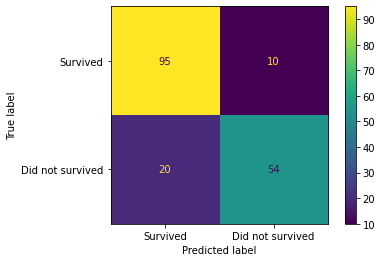

In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Predict on validation set
y_pred = rf_model.predict(x_val)

Accuracy = accuracy_score(y_val, y_pred)
print(f'Accuracy for the validation set is: {Accuracy}')

conf_matrix = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Survived', 'Did not survived']) # Replace with your actual class labels
disp.plot()
plt.show()

In [194]:
print(y_pred)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 1 0 0 0 1 1]


In [196]:
# Make pred on test data
y_test_pred = rf_model.predict(TestDf)

In [197]:
TestOg = pd.read_csv('./test.csv')

SubmissionDf = pd.DataFrame({
    "PassengerId" : TestOg['PassengerId'],
    "Survived" : y_test_pred
})

SubmissionDf.to_csv("TitanicSubmission.csv", index=False)